# <font color=orange>1.Proje-Uzak Gezegenlerin Özellikleri </font>

<img src="planets.webp">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

### <font color=orange> Veri Okuma ve Analizi: </font>

In [2]:
df=pd.read_csv("Planets.csv")

In [3]:
df.head()

,Name,LIGHT-YEARS FROM EARTH,PLANET MASS,STELLAR MAGNITUDE,DISCOVERY DATE
0,11 Comae Berenices b,304,19.4 Jupiters,4.72307,2007
1,11 Ursae Minoris b,409,14.74 Jupiters,5.013,2009
2,14 Andromedae b,246,4.8 Jupiters,5.23133,2008
3,14 Herculis b,58,8.053 Jupiters,6.61935,2002
4,16 Cygni B b,69,1.78 Jupiters,6.215,1996


Bu veri seti, uzaydaki farklı gezegenlere ait bilgileri içermektedir. İşte veri setindeki sütunların anlamları ve örnek birkaç satır:

1. **Name:** Gezegenin adını temsil eder.
2. **LIGHT-YEARS FROM EARTH:** Dünyadan ışık yılı cinsinden uzaklık.
3. **PLANET MASS:** Gezegenin kütlesi. Bazı durumlarda "Unknown" değeri bulunmaktadır.
4. **STELLAR MAGNITUDE:** Yıldızın parlaklık derecesini ifade eden bir değer.
5. **DISCOVERY DATE:** Gezegenin keşfedildiği tarih.

Örnek satırlardan birinde, gezegen adı "Kepler-731 b", Dünya'dan uzaklığı 4101 ışık yılı, gezegen kütlesi bilinmiyor (Unknown), yıldız parlaklık derecesi 15.386 ve keşif tarihi 2016 olarak verilmiştir.

**Veri Bilimi Uygulamaları:**
1. **Veri Temizleme ve Düzenleme:**
   - Eksik veya "Unknown" değerlerin ele alınması.
   - Veri tiplerinin düzeltilmesi (örneğin, PLANET MASS sütunu için sayısal bir formata dönüştürme).

2. **Özellik Mühendisliği:**
   - Belirli özelliklerin birleştirilmesi veya yeni özelliklerin oluşturulması.
   - Örneğin, gezegen kütlesi verilerinin uygun formata dönüştürülmesi.

3. **Keşifsel Veri Analizi (EDA):**
   - Veri setini görselleştirme ve temel istatistiklerle keşifsel analiz yapma.
   - Örneğin, ışık yılına göre gezegen sayısının dağılımını inceleme.

4. **Makine Öğrenimi Modeli Geliştirme:**
   - Gezegen kütlesi, ışık yılı, ve yıldız parlaklık derecesi gibi özellikler kullanılarak bir regresyon modeli oluşturma.
   - Sınıflandırma yapılacaksa, gezegenin özelliklerine dayanarak bir gezegenin "keşfedilmiş" veya "keşfedilmemiş" olup olmadığını tahmin eden bir sınıflandırma modeli oluşturma.

5. **Model Değerlendirmesi:**
   - Oluşturulan modelin performansını değerlendirme.
   - Hiperparametre ayarı ve çapraz doğrulama gibi yöntemlerle modelin iyileştirilmesi.

Bu, veri bilimi uygulamalarına başlamak için genel bir çerçevedir. Uygulanacak spesifik algoritmalar, veri setinin özelliklerine ve hedefe bağlı olarak değişecektir.

In [ ]:
df.shape

(5483, 5)

In [ ]:
df.isnull().sum()

Name                      0
LIGHT-YEARS FROM EARTH    2
PLANET MASS               0
STELLAR MAGNITUDE         1
DISCOVERY DATE            0
dtype: int64

In [ ]:
# Ayrıca Stellar magnıtude da 209 none var
# light-years from earth da 20 tane none var
# Planet mass da 25 tane unknown var

In [ ]:
df["PLANET MASS"].value_counts()

Unknown             25
2.33 Earths         21
3.33 Earths         20
4.5 Earths          19
6.8 Earths          18
                    ..
0.35061 Jupiters     1
26.572 Jupiters      1
0.549 Jupiters       1
0.1893 Jupiters      1
1.14 Earths          1
Name: PLANET MASS, Length: 2107, dtype: int64

In [ ]:
df.sort_values(by="PLANET MASS", ascending=False)

,Name,LIGHT-YEARS FROM EARTH,PLANET MASS,STELLAR MAGNITUDE,DISCOVERY DATE
4208,Kepler-731 b,4101,Unknown,15.386,2016
5186,TOI-5398 b,427,Unknown,10.059,2022
4672,KOI-217 b,2984,Unknown,15.257,2010
4248,Kepler-762 b,6192,Unknown,15.574,2016
3470,Kepler-302 c,4575,Unknown,15.694,2014
...,...,...,...,...,...
3807,Kepler-444 c,119,0.0793 Earths,8.87,2015
2353,Kepler-138 b,218,0.07 Earths,13.04,2014
3806,Kepler-444 b,119,0.0374 Earths,8.87,2015
3682,Kepler-37 e,209,0.0275 Earths,9.770001,2014


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5483 entries, 0 to 5482
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    5483 non-null   object
 1   LIGHT-YEARS FROM EARTH  5481 non-null   object
 2   PLANET MASS             5483 non-null   object
 3   STELLAR MAGNITUDE       5482 non-null   object
 4   DISCOVERY DATE          5483 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 214.3+ KB


### Veriyi daha net analiz için Görselleştirme:

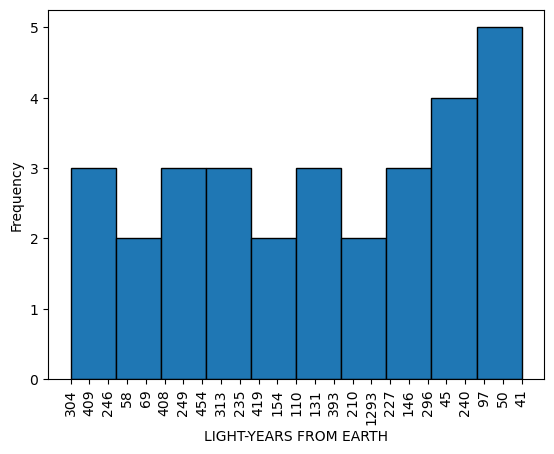

In [ ]:
# Ne kadar ışık yılı uzakta olduğunun histogram grafiği:
# Verileri filtrelemiş ilk 30 değeri göstermek isteyelim
N = 30
plt.hist(filtered_df['LIGHT-YEARS FROM EARTH'][:N], bins=10, edgecolor='k')
plt.xlabel('LIGHT-YEARS FROM EARTH')
plt.ylabel('Frequency')
# Y eksenindeki metinleri 90 derece döndür
plt.xticks(rotation=90)
plt.show()

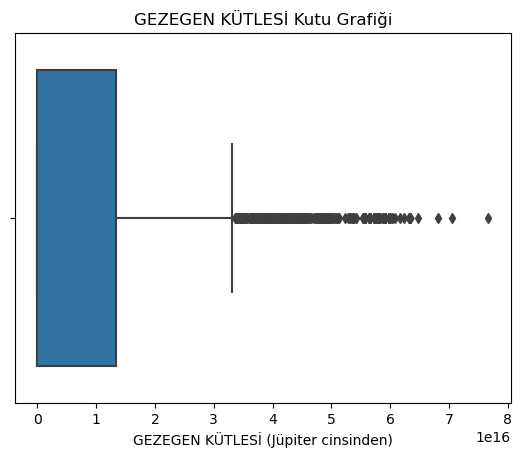

In [ ]:
# GEZEGEN KÜTLESİ Sütunu İçin Kutu Grafiği:
# Boxplot grafiğini çizin
sns.boxplot(x='PLANET MASS', data=df)
plt.xlabel('GEZEGEN KÜTLESİ (Jüpiter cinsinden)')
plt.title('GEZEGEN KÜTLESİ Kutu Grafiği')
plt.show()

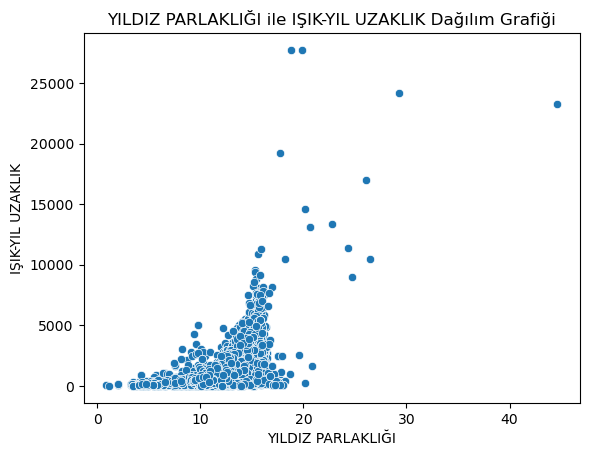

In [ ]:
# YILDIZ PARLAKLIĞI ile IŞIK-YIL UZAKLIK Arasındaki Dağılım Grafiği:
sns.scatterplot(x='STELLAR MAGNITUDE', y='LIGHT-YEARS FROM EARTH', data=df)
plt.xlabel('YILDIZ PARLAKLIĞI')
plt.ylabel('IŞIK-YIL UZAKLIK')
plt.title('YILDIZ PARLAKLIĞI ile IŞIK-YIL UZAKLIK Dağılım Grafiği')
plt.show()

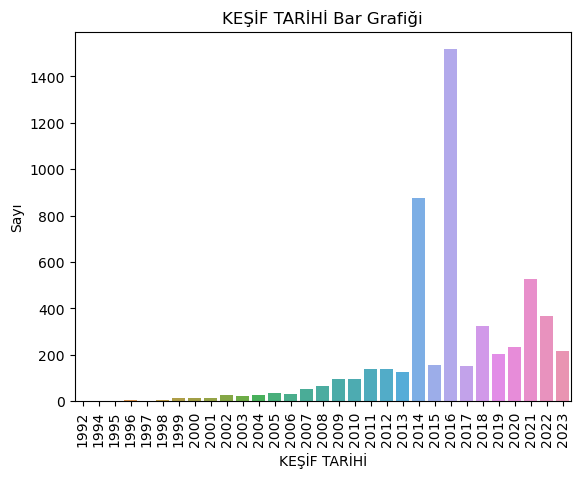

In [ ]:
# KEŞİF TARİHİ Sütunu İçin Bar Grafiği:
sns.countplot(x='DISCOVERY DATE', data=df)
plt.xlabel('KEŞİF TARİHİ')
plt.ylabel('Sayı')
plt.title('KEŞİF TARİHİ Bar Grafiği')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.sample(9)

,Name,LIGHT-YEARS FROM EARTH,PLANET MASS,STELLAR MAGNITUDE
DISCOVERY DATE,,,,
2021-01-01,HD 80869 b,279,5.065 Jupiters,8.48
2014-01-01,Kepler-273 c,2329,4.58 Earths,15.1
2022-01-01,TOI-1136 g,276,6.94 Earths,9.534
2008-01-01,HD 60532 c,85,2.51 Jupiters,4.44
2020-01-01,HATS-47 b,981,0.369 Jupiters,14.602
2016-01-01,Kepler-1389 b,1622,3.78 Earths,14.896
2016-01-01,Kepler-963 b,2517,7.56 Earths,15.091
1998-01-01,HD 168443 b,129,7.628 Jupiters,6.92122
2011-01-01,HU Aquarii AB b,627,5.9 Jupiters,16.183


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5480 entries, 2007-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    5480 non-null   object
 1   LIGHT-YEARS FROM EARTH  5480 non-null   object
 2   PLANET MASS             5480 non-null   object
 3   STELLAR MAGNITUDE       5480 non-null   object
dtypes: object(4)
memory usage: 214.1+ KB


### <font color=orange> Veriyi Modele Hazırlama: </font>

In [4]:
# Boş verileri siliyoruz
df = df.dropna()

In [ ]:
df['LIGHT-YEARS FROM EARTH'].describe()

count     5480
unique    2613
top       None
freq        20
Name: LIGHT-YEARS FROM EARTH, dtype: object

In [9]:
# 'None' değerlerini 0 ile değiştir
df['LIGHT-YEARS FROM EARTH'] = df['LIGHT-YEARS FROM EARTH'].replace('None', 0)
df['LIGHT-YEARS FROM EARTH'] = df['LIGHT-YEARS FROM EARTH'].astype(int)

In [ ]:
df['PLANET MASS'].describe()

count        5480
unique       2107
top       Unknown
freq           25
Name: PLANET MASS, dtype: object

Jüpiter kütlesi, kütlenin Jüpiter'in toplam kütlesine eşitlenmesi (1.8986 × 1027 kg, 317.83 Dünya kütlesi; 1 Dünya kütlesi eşittir 0.00315 Jüpiter kütlesi).

In [7]:
# Verileri uygun şekilde işleyin (Örneğin, "Unknown" değerleri sıfır ile değiştirin ve birim ifadeleri kaldırın)
df['PLANET MASS'] = df['PLANET MASS'].replace('Unknown', '0')
#df['PLANET MASS'] = df['PLANET MASS'].str.replace(r'(\d+(\.\d+)?) Jupiter', lambda x: str(float(x.group(1)) * 317.8), regex=True)
#df['PLANET MASS'] = df['PLANET MASS'].str.replace(r'(\d+(\.\d+)?) Earth', lambda x: str(float(x.group(1)) * 5.972), regex=True)

# Sayısal olmayan değerleri NaN ile değiştirin
#df['PLANET MASS'] = df['PLANET MASS'].apply(lambda x: ''.join(filter(str.isdigit, str(x))) if pd.notnull(x) else x)

# NaN değerleri sıfır ile doldurun
#df['PLANET MASS'].fillna(0, inplace=True)
#df['PLANET MASS'] = df['PLANET MASS'].astype(float)

# Şimdi "PLANET MASS" sütunu uygun bir şekilde işlenmiş ve sayısal değerlere sahip olmalıdır

In [ ]:
df['STELLAR MAGNITUDE'].describe()

count     5480
unique    2945
top       None
freq       209
Name: STELLAR MAGNITUDE, dtype: object

In [8]:
# "None" değerlerini 0 ile değiştirin
df['STELLAR MAGNITUDE'] = df['STELLAR MAGNITUDE'].replace('None', '0')

# "STELLAR MAGNITUDE" sütununu float türüne dönüştür
#df['STELLAR MAGNITUDE'] = df['STELLAR MAGNITUDE'].astype(float)

In [ ]:
df['DISCOVERY DATE'].describe()

count    5483.000000
mean     2016.039394
std         4.458113
min      1992.000000
25%      2014.000000
50%      2016.000000
75%      2019.000000
max      2023.000000
Name: DISCOVERY DATE, dtype: float64

In [ ]:
# İŞLENMİŞ HALİ İLE VERİ İNFOSUNA TEKRAR BAKALIM
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5480 entries, 0 to 5482
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    5480 non-null   object 
 1   LIGHT-YEARS FROM EARTH  5480 non-null   int32  
 2   PLANET MASS             5480 non-null   float64
 3   STELLAR MAGNITUDE       5480 non-null   float64
 4   DISCOVERY DATE          5480 non-null   int64  
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 235.5+ KB


In [ ]:
df.corr()

,LIGHT-YEARS FROM EARTH,PLANET MASS,STELLAR MAGNITUDE,DISCOVERY DATE
LIGHT-YEARS FROM EARTH,1.000000,0.018637,-0.237933,0.120029
PLANET MASS,0.018637,1.000000,0.026761,0.001573
STELLAR MAGNITUDE,-0.237933,0.026761,1.000000,0.095468
DISCOVERY DATE,0.120029,0.001573,0.095468,1.000000


In [ ]:
df.corr()['PLANET MASS'].sort_values(ascending=False)

PLANET MASS               1.000000
STELLAR MAGNITUDE         0.026761
LIGHT-YEARS FROM EARTH    0.018637
DISCOVERY DATE            0.001573
Name: PLANET MASS, dtype: float64

In [ ]:
df.corr()['LIGHT-YEARS FROM EARTH'].sort_values(ascending=False)

LIGHT-YEARS FROM EARTH    1.000000
DISCOVERY DATE            0.120029
PLANET MASS               0.018637
STELLAR MAGNITUDE        -0.237933
Name: LIGHT-YEARS FROM EARTH, dtype: float64

In [ ]:
df.corr()['STELLAR MAGNITUDE'].sort_values(ascending=False)

STELLAR MAGNITUDE         1.000000
DISCOVERY DATE            0.095468
PLANET MASS               0.026761
LIGHT-YEARS FROM EARTH   -0.237933
Name: STELLAR MAGNITUDE, dtype: float64

In [ ]:
df.sample(10)

,Name,LIGHT-YEARS FROM EARTH,PLANET MASS,STELLAR MAGNITUDE,DISCOVERY DATE
3725,Kepler-398 d,579,3.672780e+16,13.49900,2016
92,CoRoT-14 b,5691,2.415280e+05,15.93200,2010
819,HD 19994 b,73,4.353860e+05,5.06345,2003
4954,TOI-1064 b,222,8.062200e+04,10.93800,2022
1245,HIP 41378 d,347,8.898280e+15,8.93000,2016
1716,K2-415 b,71,4.479000e+16,15.33000,2023
2747,Kepler-1685 b,3725,4.275952e+06,16.09600,2020
1097,HD 63935 b,160,6.449760e+05,8.58000,2021
218,GJ 180 d,39,4.514832e+06,10.91400,2020
5359,WASP-18 b,403,3.241560e+05,9.28000,2009


In [ ]:
df.dropna(subset=['LIGHT-YEARS FROM EARTH', 'DISCOVERY DATE', 'STELLAR MAGNITUDE', 'PLANET MASS'], inplace=True)

In [10]:
# PLANET MASS ve Name sütunlarına get_dummies işlemini uygulayın
df = pd.get_dummies(df, columns=['PLANET MASS', 'Name'], drop_first=True)

# drop_first=True, ilk kategoriye karşılık gelen sütunu düşürür

# Yeniden şekillendirilmiş veriyi gözlemleyin
print(df.head())

   LIGHT-YEARS FROM EARTH STELLAR MAGNITUDE  DISCOVERY DATE  \
0                     304           4.72307            2007   
1                     409             5.013            2009   
2                     246           5.23133            2008   
3                      58           6.61935            2002   
4                      69             6.215            1996   

   PLANET MASS_0.02 Earths  PLANET MASS_0.0275 Earths  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   PLANET MASS_0.0374 Earths  PLANET MASS_0.07 Earths  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                      

In [ ]:
df.shape

(5480, 7587)

In [ ]:
df.columns

Index(['LIGHT-YEARS FROM EARTH', 'STELLAR MAGNITUDE',
       'PLANET MASS_0.02 Earths', 'PLANET MASS_0.0275 Earths',
       'PLANET MASS_0.0374 Earths', 'PLANET MASS_0.07 Earths',
       'PLANET MASS_0.0793 Earths', 'PLANET MASS_0.087 Earths',
       'PLANET MASS_0.0933 Earths', 'PLANET MASS_0.1 Earths',
       ...
       'Name_XO-7 b', 'Name_Xi Aquilae b', 'Name_YSES 2 b', 'Name_YZ Ceti b',
       'Name_YZ Ceti c', 'Name_YZ Ceti d', 'Name_b Centauri AB b',
       'Name_gam1 Leonis b', 'Name_mu2 Scorpii b', 'Name_psi1 Draconis B b'],
      dtype='object', length=7587)

### Modelleme

In [ ]:
# Regression

In [11]:
# Hedefimizi yani tahmin edeceğimiz ışıkyılı uzaklığı sütununu tanımlayalım
# X ve y değişkenlerini oluşturun
x = df.drop(columns=['LIGHT-YEARS FROM EARTH'])  # LIGHT-YEARS FROM EARTH sütununu çıkart
y = df['LIGHT-YEARS FROM EARTH']  # LIGHT-YEARS FROM EARTH sütunu

In [ ]:
def fnc_all_regression_models(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor

    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()

    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]

    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)

    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))

    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae

    return result.sort_values('R_Squared',ascending=False)

In [ ]:
fnc_all_regression_models(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.738240,1890.537650,1042.211340
ExtraTreeRegressor,0.683943,2077.382494,1032.937044
KNeighborsRegressor,0.676859,2100.535714,1150.329927
ElasticNet,0.071201,3561.187611,2124.753051
Ridge,0.045799,3609.556142,2173.382172
LinearRegression,-0.049495,3785.508434,2553.566056
Lasso,-0.167857,3993.271209,1777.249096


In [13]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.7 MB/s eta 0

In [15]:
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 41.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.1.0 requires scipy~=1.10.1, but you have scipy 1.11.3 which is incompatible.


In [16]:
!pip install --upgrade pycaret

  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3


In [17]:
# AutoML-Pycaret
from pycaret.regression import *

# Veri çerçevesini yükleyin (df'yi kullanıyoruz)
setup(data=df, target='LIGHT-YEARS FROM EARTH')

# Regresyon modeli seçin ve eğitin
best_model = compare_models()

# Model performansını değerlendirin
evaluate_model(best_model)

,Description,Value
0,Session id,4567
1,Target,LIGHT-YEARS FROM EARTH
2,Target type,Regression
3,Original data shape,"(5480, 7588)"
4,Transformed data shape,"(5480, 7588)"
5,Transformed train set shape,"(3835, 7588)"
6,Transformed test set shape,"(1645, 7588)"
7,Numeric features,7586
8,Categorical features,1
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1106.5038,4478374.8452,2098.5937,0.6004,1.2409,3.0429,22.1580
gbr,Gradient Boosting Regressor,1149.4933,4654169.2860,2141.0888,0.5799,1.2963,3.4498,39.6660
knn,K Neighbors Regressor,1143.4432,4872572.6424,2183.2534,0.5656,1.2566,3.1841,21.9570
xgboost,Extreme Gradient Boosting,1147.4111,4879720.7357,2186.5900,0.5618,1.2684,3.3001,27.3320
ada,AdaBoost Regressor,1337.7783,5240993.5270,2278.2138,0.5380,1.3860,4.1988,25.7260
rf,Random Forest Regressor,1127.0944,5301832.9980,2272.9580,0.5273,1.2514,3.0802,50.9360
en,Elastic Net,1434.8742,5291890.7397,2293.6352,0.5148,1.5399,5.2234,21.5280
llar,Lasso Least Angle Regression,1437.3798,5305080.7873,2296.4856,0.5139,1.5397,5.2164,21.7360
ridge,Ridge Regression,1410.4796,5328452.6755,2301.7508,0.5136,1.5038,4.8719,24.2560
et,Extra Trees Regressor,1137.4495,5511744.6819,2313.6184,0.5132,1.2589,3.0538,82.2400


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…